# MEBS figures

In [82]:
#Import libraries
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib

In [83]:
#ROC libraries
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn import metrics

# MEBS in genomic dataset 

Read the Scores 

In [49]:
gen= pd.read_table('data_notebook/scores_pos_neg.tab',index_col=0, 
                   sep="\t",names=["Genome","SS"])
gen.head()

,SS
Genome,
GCF_000005825.2_ASM582v2,2.366
GCF_000005845.2_ASM584v2,2.345
GCF_000006175.1_ASM617v2,6.122
GCF_000006605.1_ASM660v1,-2.895
GCF_000006625.1_ASM662v1,-0.861


# Basic statistics of SS in genomic dataset

In [50]:
#Stistics 
pergen95= np.percentile(gen.SS,95)
print ("Maximum Gen score:\t", gen.SS.max() )
print ("Mediam gen score:\t",gen.SS.mean())
print ("Sem gen score:\t", gen.SS.sem())
print ("Std gen score:\t", gen.SS.std() )
print ("95 Percentile:\t", pergen95)

Maximum Gen score:	 12.508
Mediam gen score:	 1.76400759374
Sem gen score:	 0.0618463375997
Std gen score:	 2.83887489734
95 Percentile:	 7.8071


Add the taxonomy and metabolic categories (sur, suli , non sulfur ) 

In [90]:
#cut -f 1,8 assembly_refseq.nr2016.txt >gen.tab

Read the manualy curated file 

In [51]:
df =  pd.read_table('data_notebook/gen_curated_taxonomy2.tab', index_col=0)
df.head()

,Specie,SS,Kigdom,Phylum,Class,Order,Family,Genus,Guild,Category
ID,,,,,,,,,,
GCF_000005825.2,Bacillus pseudofirmus OF4,2.366,Bacteria,Firmicutes,Bacilli,Bacillales,Bacillaceae,Bacillus,NS,NS
GCF_000005845.2,Escherichia coli str. K-12 substr. MG1655,2.345,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacteriales,Enterobacteriaceae,Escherichia,NS,NS
GCF_000006605.1,Corynebacterium jeikeium K411,-2.895,Bacteria,Actinobacteria,Corynebacteriales,Corynebacteriaceae,Corynebacterium,0,NS,NS
GCF_000006625.1,Ureaplasma parvum serovar 3 str. ATCC 700970,-0.861,Bacteria,Tenericutes,Mollicutes,Mycoplasmataceae,Ureaplasma,0,NS,NS
GCF_000006645.1,Yersinia pestis KIM10+,0.387,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacteriales,Enterobacteriaceae,Yersinia,NS,NS


In [92]:
df.columns

Index(['Specie ', 'SS', 'Kigdom ', 'Phylum ', 'Class ', 'Order ', 'Family ',
       'Genus ', 'Guild', 'Category'],
      dtype='object')

# Manually curated genomes SUR 

In [52]:
sur = pd.read_table("data_notebook/sur.txt")
sur.head()

,Taxa,Feature,Category,SS
0,Dehalococcoides mccartyi CBDB1,NaN,Biorremediation,5.877
1,Dehalococcoides mccartyi 195,NaN,Biorremediation,5.851
2,Dehalococcoides mccartyi VS,NaN,Biorremediation,5.744
3,Anaeromyxobacter dehalogenans 2CP-C,NaN,Biorremediation,5.633
4,Geobacter daltonii FRC-32,NaN,Biorremediation,5.510


### Boxplot by metabolic capabilities 

Functiont to sort data frame according to the mediam 

In [53]:
def median_sort(df):
    """Sort the columns acording to the median"""
    median_sorted = df.median().argsort()
    df_sorted = df.T.ix[median_sorted].T
    return df_sorted

### Sort by metabolic capabilities

In [54]:
cap_= df[['SS', 'Category']]
caps = cap_['Category'].unique()
mydic = {}
for f in caps:
    values = cap_['SS'][cap_['Category'] == f]
    values = values.get_values()
    mydic[f] = pd.Series(values)
cap_dic = pd.DataFrame(mydic)
cap_sort = median_sort(cap_dic)

/home/val/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.


In [55]:
cap_sort.count()

NS      1754
Sur      192
Suli     161
dtype: int64

### Plot metabolic capabilities 

In [56]:
print(cap_sort.Suli.min())
print (cap_sort.NS.max())

0.276
4.541


# Figure 5 in the article 

## 5A

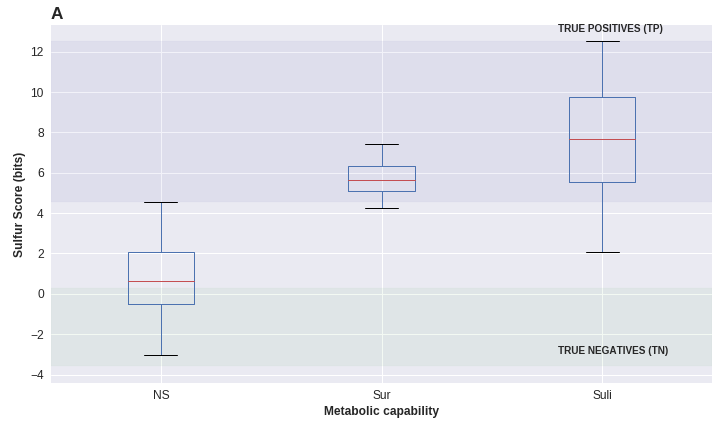

In [57]:
fig = plt.figure(figsize=(10,6))
x = cap_sort.boxplot(rot=360, whis=True )
plt.xticks(size='large')
plt.yticks(size='large')
plt.xlabel('Metabolic capability', weight='bold', size='large')
plt.ylabel('Sulfur Score (bits)', weight='bold',size = 'large')
plt.annotate( 'SS nr(gen)', (4, 16))
plt.annotate ('TRUE NEGATIVES (TN)', (2.8, -3), weight ='bold')
plt.annotate ('TRUE POSITIVES (TP)', (2.8,13), weight ='bold')
plt.annotate ('95 -perc',(4, 10.5), size ='small' )
#FALSE POSITIVES
plt.axhspan(cap_sort.Suli.min(),cap_sort.NS.min(), alpha= 0.05, color ='forestgreen')
plt.axhspan(cap_sort.NS.max(),cap_sort.Suli.max(), alpha= 0.05, color ='darkblue')
#plt.axhline(6.5, color='blue', linewidth=1, ls='-', alpha =0.2)
#plt.axhline(np.percentile(df.SS,95), color= 'blue', linewidth =1, alpha = 0.2, ls='--')
#plt.axhline(cap_sort.Suli.min(), color='green', linewidth=1, ls='-', alpha =0.2)
#plt.axhline(cap_sort.NS.max(), color='blue', linewidth=1, ls='-', alpha= 0.2)
#plt.axhline(cap_sort.All.max(), color='red', linewidth=1, ls='-', alpha = 0.2)
plt.title ('A', size ='xx-large', weight ='bold', loc ='left')
#plt.savefig("Fig5A.png", dpi = 400)
plt.tight_layout()

### Plot by metabolic guilds 

In [58]:
guild_= df[['SS', 'Guild']]
guilds = guild_['Guild'].unique()
mydic = {}
for f in guilds:
    values = guild_['SS'][guild_['Guild'] == f]
    values = values.get_values()
    mydic[f] = pd.Series(values)
guild_dic = pd.DataFrame(mydic)
guild_sort = median_sort(guild_dic)

/home/val/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.


# 5C

/home/val/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


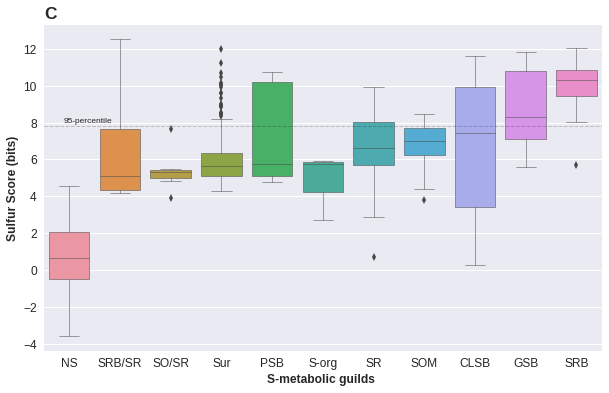

In [59]:
plt.figure(figsize=(10,6))
plt.title('C', loc='left', size='xx-large', weight='bold')
plt.xticks(size='large')
plt.yticks(size='large')
sns.boxplot(guild_sort
            , orient ='v', linewidth=0.5) 
plt.axhline(pergen95,  color='black', linewidth=1, ls='--', alpha = 0.2)
plt.annotate('95-percentile',(-0.1,8), size='small')
plt.xlabel('S-metabolic guilds ', weight='bold', size='large')
plt.ylabel('Sulfur Score (bits)', weight='bold', size='large')
#plt.savefig('Fig5C.png', dpi=400)

### Figure 5B 

In [60]:
#Create Roc curve 
#Create df
roc = df[['SS','Category']]

#Eliminate SUR  and create another varable
rocsuli = roc[roc.Category !='Sur']
#replace by binary dataframe
rocsulibin = rocsuli.replace(['Suli', 'NS'], 
                [1, 0])
#Create another with SUR as positive 
rocbin = roc.replace (['Suli', 'Sur','NS'], 
                [1, 1,0])
#rocbin.head()

In [61]:
rocsulibin.head()

,SS,Category
ID,,
GCF_000005825.2,2.366,0
GCF_000005845.2,2.345,0
GCF_000006605.1,-2.895,0
GCF_000006625.1,-0.861,0
GCF_000006645.1,0.387,0


In [62]:
#Create arrays contanining the values 
#Scores of all including (Suli and Sur)
scoresrocbin = rocbin.as_matrix(columns=['SS'])
#Scores of curated matrix (Suli )
scoresrocsuli  = rocsulibin.as_matrix(columns=['SS'])
#Create arras containing positive or negative 
#Suli and Sur
act_rocbin =  rocbin.as_matrix(columns=['Category'])
#Suli 
act_rocsuli  = rocsulibin.as_matrix(columns=['Category'])

In [63]:
false_positive_rate_s, true_positive_rate_s, thresholds_s = roc_curve(act_rocsuli, scoresrocsuli, drop_intermediate=False)
roc_auc_suli = auc(false_positive_rate_s, true_positive_rate_s)

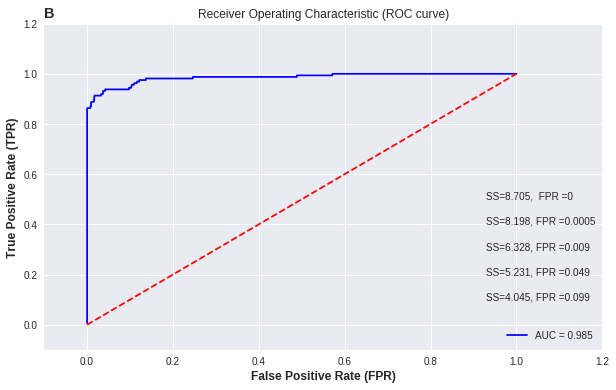

In [64]:
#plot with the same size 
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title('B', loc='left', size='x-large', weight='bold')
plt.title('Receiver Operating Characteristic (ROC curve)',)
plt.plot(false_positive_rate_s, true_positive_rate_s, 'b',
label='AUC = %0.3f'% roc_auc_suli)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.annotate("SS=8.705,  FPR =0", (.93, 0.5), size='medium')
plt.annotate("SS=8.198, FPR =0.0005", (.93, 0.4), size='medium')
plt.annotate("SS=6.328, FPR =0.009", (.93, 0.3), size='medium')
plt.annotate("SS=5.231, FPR =0.049", (.93, 0.2), size='medium')
plt.annotate("SS=4.045, FPR =0.099", (.93, 0.1), size='medium')
#plt.axhspan(1.2,0.8)

plt.ylabel('True Positive Rate (TPR)', weight='bold',size='large')
plt.xlabel('False Positive Rate (FPR)',weight='bold',size='large')
#plt.savefig("Fig5B.png", dpi = 400 )

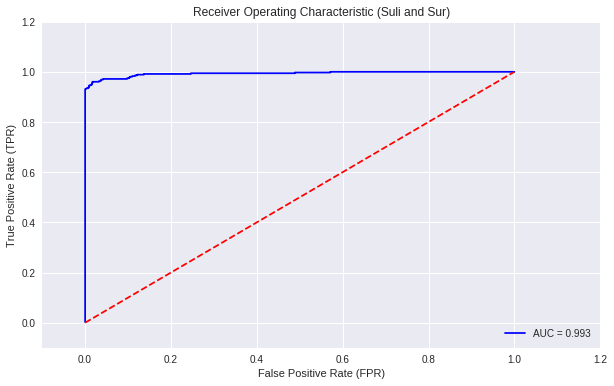

In [65]:
#plt.title ('B', size ='x-large', weight ='bold', loc ='left')
#Suli and Sur
false_positive_rate, true_positive_rate, thresholds = roc_curve(act_rocbin, scoresrocbin, drop_intermediate=False)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characteristic (Suli and Sur)')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
#plt.savefig("roc_sur.png", dpi=300)

# Get the Scores according to their FPR

In [66]:
# Suli and Sur 
rate=0.1
value=(len([x for x in list(false_positive_rate) if x<rate]))
print ("FPR Sur Suli")
print ("==============")
print(list(false_positive_rate)[value-1])
print ("==============")
print ("SS Sur Suli")
print ("==============")
print (list(thresholds)[value-1])

FPR Sur Suli
0.099771949829
SS Sur Suli
3.029


In [67]:
#Suli 
rate=0.0001

value=(len([x for x in list(false_positive_rate_s) if x<rate]))
print ("FPR Suli")
print ("==============")
print(list(false_positive_rate_s)[value-1])
print ("==============")
print ("SS")
print ("==============")
print (list(thresholds_s)[value-1])

FPR Suli
0.0
SS
4.675


# Metagenomic dataset 

### Read Metagenomic dataset with metadata

In [69]:
metadata = pd.read_table('data_notebook/metadata_SS.public_private_features_ccc.tab', index_col=0)

In [70]:
#Delete human host associated 
mask1 = metadata['env_package'] == 'human-gut'
mask2 = metadata['env_package'] == 'human-associated'
mask = mask1 | mask2
mask = ~mask
metadata = metadata[mask]

# Statistics metagenomic dataset

In [72]:
met30= pd.read_table('data_notebook/scores30.tab',index_col=0, sep="\t",names=["Met","SS"])
met60= pd.read_table('data_notebook/scores60.tab',index_col=0, sep="\t",names=["Met","SS"])
met100 =pd.read_table('data_notebook/scores100.tab',index_col=0, sep="\t",names=["Met","SS"])
met150= pd.read_table('data_notebook/scores150.tab',index_col=0, sep="\t",names=["Met","SS"])
met200= pd.read_table('data_notebook/scores200.tab',index_col=0, sep="\t",names=["Met","SS"])
met250= pd.read_table('data_notebook/scores250.tab',index_col=0, sep="\t",names=["Met","SS"])
met300= pd.read_table('data_notebook/scores300.tab',index_col=0, sep="\t",names=["Met","SS"])

In [73]:
per95_30 =np.percentile(met30, 95)
per95_60 =np.percentile(met60, 95)
per95_100 =np.percentile(met100, 95)
per95_150 =np.percentile(met150, 95)
per95_200 =np.percentile(met200, 95)
per95_250 =np.percentile(met250, 95)
per95_300 =np.percentile(met300, 95)

In [75]:
statsmet=pd.DataFrame(columns=['30','60','100','150','200','250','300'], 
                 index=['95-per','max','mean','sem','std'])

statsmet.loc['95-per'] = pd.Series({'30':np.percentile(met30,95), 
                                    '60':np.percentile(met60,95),  
                                    '100':np.percentile(met100,95), 
                                    '150':np.percentile(met150,95), 
                                    '200':np.percentile(met200,95),  
                                    '250':np.percentile(met250,95),  
                                   '300':np.percentile(met300,95) })

statsmet.loc['max'] = pd.Series({'30':met30.SS.max(), '60':met60.SS.max(), '100':met100.SS.max(), 
                                 '150':met150.SS.max(),'200':met200.SS.max(),'250':met250.SS.max() ,
                                 '300':met300.SS.max()})

statsmet.loc['mean'] = pd.Series({'30':met30.SS.mean(), '60':met60.SS.mean(), 
                                  '100':met100.SS.mean(), '150':met150.SS.mean(),
                                  '200':met200.SS.mean(), '250':met250.SS.mean(),
                                  '300':met300.SS.mean()})
statsmet.loc['sem'] = pd.Series({'30':met30.SS.sem(), '60':met60.SS.sem(), 
                                  '100':met100.SS.sem(), '150':met150.SS.sem(),
                                  '200':met200.SS.sem(), '250':met250.SS.sem(),
                                  '300':met300.SS.sem()})

statsmet.loc['std'] = pd.Series({'30':met30.SS.std(), '60':met60.SS.std(), 
                                  '100':met100.SS.std(), '150':met150.SS.std(),
                                  '200':met200.SS.std(), '250':met250.SS.std(),
                                  '300':met300.SS.std()})
statsmet.T.to_csv('data_notebook/statsmet.csv', sep='\t')
statsmet.T


,95-per,max,mean,sem,std
30,7.6559,7.781,4.63239,0.145011,3.13706
60,9.70175,9.918,4.73827,0.420224,3.41392
100,8.8106,9.093,5.78432,0.195806,2.51517
150,8.508,9.986,3.2243,0.365733,3.639
200,8.1834,9.547,4.07182,0.300921,2.64057
250,8.9811,9.274,5.73826,0.424788,3.23509
300,7.6105,8.381,2.50933,3.00404,5.20316


# Sort by environmental packages

In [76]:
envpack_ = metadata[['SS', 'env_package']]
envpackages= envpack_['env_package'].unique()
mydicenv={}
for e in envpackages:
    values= envpack_['SS'][envpack_['env_package'] == e]
    values = values.get_values()
    mydicenv[e] =pd.Series(values)

In [77]:
env_pac =pd.DataFrame(mydicenv)
env_pac_sort =median_sort(env_pac)

/home/val/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.


/home/val/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


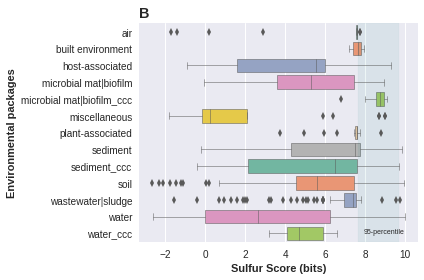

In [78]:
#plt.figure(figsize=(6,10))
plt.title('B', loc='left', size='x-large', weight='bold')
sns.boxplot(env_pac, orient ='h', linewidth=0.5, palette="Set2")
plt.xlabel("Sulfur Score (bits)", weight='bold')
plt.ylabel("Environmental packages", weight='bold')
plt.axvspan(per95_30, per95_60, alpha=0.07, color='teal')
plt.annotate ("95-percentile", (7.9,12), size ='x-small')
plt.tight_layout()
#plt.savefig("Fig_6B_ccc.png", dpi=300)

In [79]:
# Color dictionary
env_packages = metadata.env_package.unique()
#### Specific colors
#mycolors = plt.cm.spectral(np.linspace(0, 1, len(env_packages)))
mycolors = plt.cm.Set2(np.linspace(0, 1, len(env_packages)))
###
coldic = {}
for env, col in zip(env_packages, mycolors):
    coldic[env] = col
## Color of "water" env package
#coldic['water'] = [0.5, 0.5, 0.5, 1]
        
f_coldic = {}
for feat in metadata.feature.unique():
    env_p = metadata[metadata.feature == feat].iloc[0]['env_package']
    f_coldic[feat] = coldic[env_p]

In [80]:
feature_ =  metadata[['SS', 'feature']]
features = feature_['feature'].unique()

mydic = {}
for f in features:
    values = feature_['SS'][feature_['feature'] == f]
    values = values.get_values()
    mydic[f] = pd.Series(values)
env_feature = pd.DataFrame(mydic)
env_f_sorted = median_sort(env_feature)

/home/val/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.


# Figure 6 B

/home/val/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


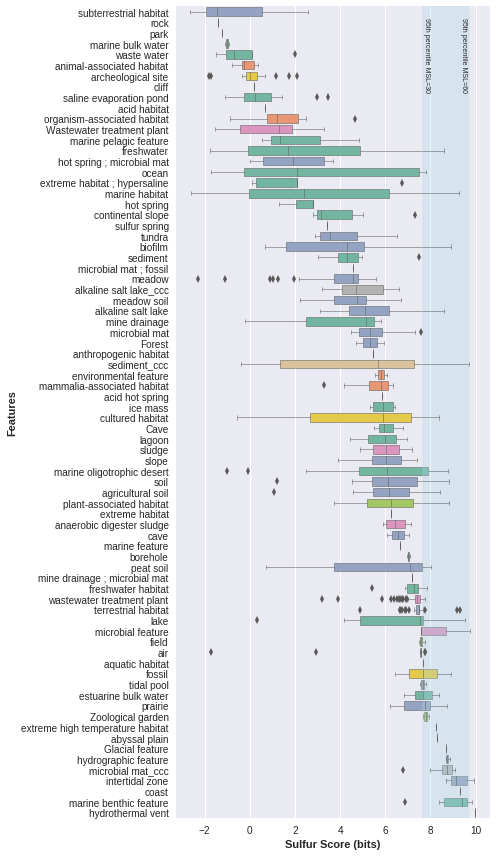

In [81]:
fig = plt.figure(figsize=(7,12))
sns.set_style("darkgrid")
sns.boxplot(env_f_sorted
            , orient ='h', linewidth=0.5, palette=f_coldic) 
plt.xlabel("Sulfur Score (bits)", weight='bold')
plt.ylabel("Features", weight='bold')
plt.axvspan(per95_30, per95_60, alpha=0.3, color='lightblue')
plt.axvline(per95_30,color='lightblue', ls="-", linewidth=0.3 )
plt.axvline(per95_60,color='lightblue', ls="-", linewidth=0.3 ) 
plt.annotate ("95th percentile MSL=30", (per95_30,1), size ='x-small',
             rotation=270)
plt.annotate ("95th percentile MSL=60", (per95_60-0.4,1), size ='x-small',
             rotation=270)
plt.tight_layout()
#plt.savefig("env_packages_set3.png", dpi=400)

# Supplementary Figures 

Function 

# Histogram of MSL distribucion in Met  and input Sucy proteins 

In [115]:
metadata

,Public/private,SS,SS_pos,SS_2014_pos,SS_2014_up,biome,feature,material,env_package,location,latitude,longitude,depth
ID,,,,,,,,,,,,,
4440036.3,Public,0.377,3.044,3.934,3.349,marine habitat,marine habitat,marine habitat,water,Kingman Atoll,6.3856,-162.334722,~10
4440037.3,Public,1.028,4.478,5.149,4.161,marine habitat,marine habitat,marine habitat,water,Kingman Atoll,6.3856,-162.334722,~10
4440038.3,Public,0.218,5.220,7.523,5.689,marine habitat,marine habitat,marine habitat,water,Christmas (Kiritimati) Atoll,1.99231667,-157.4840667,~10
4440039.3,Public,1.119,5.353,5.943,4.687,marine habitat,marine habitat,marine habitat,water,Palmyra Atoll,5.866944,-162.1278,~10
4440041.3,Public,0.592,4.158,5.683,5.019,marine habitat,marine habitat,marine habitat,water,Christmas (Kiritimati) Atoll,1.99231667,157.4840667,~10
4440060.4,Public,1.047,5.058,6.015,5.215,marine habitat,marine habitat,marine habitat,water,Rio Mesquites,26.9125,-102.115,0
4440061.3,Public,-0.246,0.595,1.169,1.036,marine habitat,marine habitat,marine habitat,water,Highborne Cay Island,24.7257,-76.8188,0
4440067.3,Public,2.514,7.871,8.664,6.787,marine habitat,marine habitat,marine habitat,water,Pozas Azules II,26.872,-102.0773,0
4440090.3,Public,0.549,5.046,6.408,4.723,marine biome,saline evaporation pond,saline water,water,"Chula Vista, CA",32.6,-117.1072,0


# Random scores  Gen 


In [116]:
randgen=pd.read_table('data_notebook/hmmsearch.random_scores.tab',index_col=0)
print ("==============")
print ("Mediam gen score")
print(randgen.mean().mean())
print ("==============")
print ("Sem gen score")
print(randgen.mean().sem())
print ("==============")
print ("Std gen score")
print(randgen.mean().std())
print ("==============")
print("95-percentile")
print ("==============")
print (np.percentile(randgen,95))
print ("Maximum_value")
print ("==============")
print (randgen.max().max())


Mediam gen score
1.04595082819
Sem gen score
0.000616545755862
Std gen score
0.0194968887024
95-percentile
4.689
Maximum_value
11.989


In [117]:
randgen.mean().std()

0.019496888702352985

### Metagenomic dataset 

Run the following script in a directory containing all the hmmsearch.tab files 

In [20]:
#!/bin/bash
#for file  in *.tab
# do  for r  in {1..1000}
#      do perl /home/valdeanda/src/metagenome_Pfam_score-master/scripts/pfam_score.pl  pfam_score.pl -input  $file  -size 30 -matrixdir /home/valdeanda/src/metagenome_Pfam_score-master/data/entropies_matrix/ -random 51  > $file.$r.score
#        done
#        done 

Extract the random scores  

In [21]:
#perl scripts/extract_random_scores.pl -dire random_scores/random300/

Read output files 

# Read data

In [118]:
rand30= pd.read_table('data_notebook/30.random_scores.tab', index_col=0)
rand60 =pd.read_table('data_notebook/60.random_scores.tab',index_col=0)
rand100 = pd.read_table('data_notebook/100.random_scores.tab',index_col=0)
rand150=pd.read_table('data_notebook/150.random_scores.tab',index_col=0)
rand200=pd.read_table('data_notebook/200.random_scores.tab',index_col=0)
rand250=pd.read_table('data_notebook/250.random_scores.tab',index_col=0)
rand300 =pd.read_table('data_notebook/300.random_scores.tab',index_col=0)

In [119]:
rand30.head()

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
4440036.3,0.275,-0.051,-0.405,-0.445,-0.636,0.129,-0.335,0.660,0.378,0.445,...,-0.609,-0.226,0.464,-0.351,-0.111,1.213,1.578,0.404,0.039,0.133
4440037.3,-0.361,1.261,0.694,-0.140,1.285,-0.238,-0.177,0.850,1.518,-1.295,...,-0.291,0.986,0.028,1.113,1.187,-0.686,0.081,0.694,-0.042,-0.019
4440038.3,-1.532,-0.423,0.488,0.505,2.158,-1.140,-1.165,0.142,0.768,1.153,...,1.794,0.090,-0.901,-0.437,-2.524,1.013,1.440,0.188,-0.058,2.065
4440039.3,-0.463,1.647,0.614,0.398,1.179,0.581,0.932,2.415,0.339,0.389,...,-0.297,-0.237,1.243,1.251,2.095,-0.750,-1.367,0.323,1.524,1.725
4440041.3,-0.557,1.619,-0.200,0.560,-0.800,0.267,-0.117,-0.035,0.094,-1.098,...,-0.349,-0.129,-0.937,-0.280,0.493,0.055,0.808,-1.270,-0.126,0.776


Compute some basic statistics 

In [120]:
statsmetrdm=pd.DataFrame(columns=['30','60','100','150','200','250','300'], 
                 index=['95-per','max','mean','sem','std'])

statsmetrdm.loc['95-per'] = pd.Series({'30':np.percentile(rand30, 95),
                                       '60':np.percentile(rand60,95), 
                                 '100':np.percentile(rand100,95), 
                                 '150':np.percentile(rand150,95),
                                 '200':np.percentile(rand200,95),
                                 '250':np.percentile(rand250,95),
                                 '300':np.percentile(rand300,95)})
statsmetrdm.loc['max'] = pd.Series({'30':rand30.T.max().max(),
                                    '60':rand60.T.max().max(), 
                                 '100':rand100.T.max().max(), 
                                 '150':rand150.T.max().max(),
                                 '200':rand200.T.max().max(),
                                 '250':rand250.T.max().max(),
                                 '300':rand300.T.max().max()})

statsmetrdm.loc['mean'] = pd.Series({'30':rand30.T.mean().mean(), '60':rand60.T.mean().mean(), 
                                 '100':rand100.T.mean().mean(), 
                                 '150':rand150.T.mean().mean(),
                                 '200':rand200.T.mean().mean(),
                                 '250':rand250.T.mean().mean(),
                                 '300':rand300.T.mean().mean()})

statsmetrdm.loc['sem'] = pd.Series({'30':rand30.T.mean().sem(), '60':rand60.T.mean().sem(), 
                                 '100':rand100.T.mean().sem(), 
                                 '150':rand150.T.mean().sem(),
                                 '200':rand200.T.mean().sem(),
                                 '250':rand250.T.mean().sem(),
                                 '300':rand300.T.mean().sem()})


statsmetrdm.loc['std'] = pd.Series({'30':rand30.T.mean().std(), 
                                    '60':rand60.T.mean().std(), 
                                 '100':rand100.T.mean().std(), 
                                 '150':rand150.T.mean().std(),
                                 '200':rand200.T.mean().std(),
                                 '250':rand250.T.mean().std(),
                                 '300':rand300.T.mean().std()})

statsmetrdm.T

,95-per,max,mean,sem,std
30,5.405,9.504,2.24647,0.0710269,1.53655
60,6.64105,11.417,2.67775,0.241028,1.95812
100,6.37705,11.202,3.1703,0.107157,1.37645
150,5.662,10.804,1.69923,0.191868,1.90906
200,5.358,10.19,2.10785,0.159039,1.39556
250,6.392,10.823,3.02422,0.226186,1.72258
300,6.2583,8.735,1.40788,1.63879,2.83847


In [121]:
#MAXIMUM SCORE VALUES 
max30 = 13.676
max60 = 16.818
max100 = 15.566
max150  = 15.848 
max200 = 15.587
max250 = 16.031
max300 = 15.229 

In [126]:
rand60SS =pd.read_table('data_notebook/60.random_scores.SS.t.tab',index_col=0)
rand60SS.drop=rand60SS.drop(rand60SS.index[[0]])

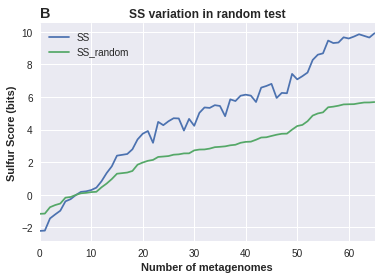

In [123]:
mean60=pd.read_table('data_notebook/example60.sorted.mean.tab')
 
mean60.plot()
plt.title('B', loc='left', fontweight='bold', size='x-large')
plt.title('SS variation in random test', fontweight='bold')
plt.ylabel('Sulfur Score (bits)', fontweight='bold')
plt.xlabel('Number of metagenomes', fontweight='bold')
#plt.savefig('Sup4.b.png',dpi=300)

# Figure Supplementary 7 B

/home/val/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.
/home/val/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


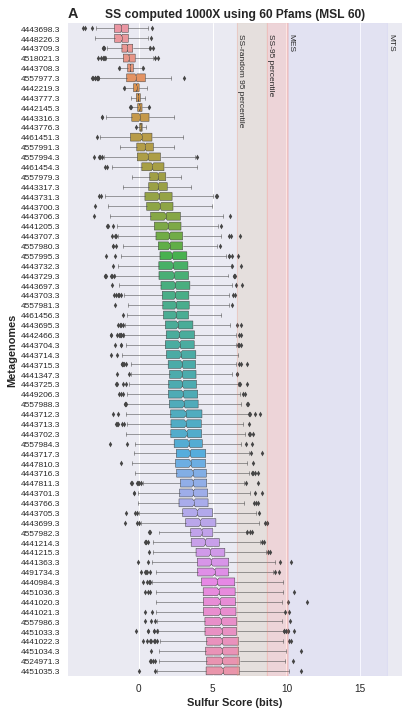

In [127]:
plt.figure(figsize=(6,12))
plt.title('A', loc='left', size='x-large', weight='bold')
sns.boxplot(median_sort(rand60SS.drop)
            , orient ='h', linewidth=0.5, notch=True, fliersize=4)

plt.yticks(size='small')
plt.xlabel('Sulfur Score (bits)', weight='bold')
plt.ylabel('Metagenomes', weight='bold')

#Vertical lines 
#Maximum theoretical score 
plt.axvline(max60, color='blue',
            linewidth=1, ls='-',alpha = 0.05)
#Random percentile
plt.axvline(np.percentile(rand60SS,95), color='salmon', linewidth=1, ls='-', alpha = 0.2)
#Real percentile 
plt.axvline(np.percentile(metadata.SS, 95), color = 'salmon',linewidth=1, ls='-', alpha = 0.2)
#Maximum expected score 
plt.axvline(10.085,color='salmon', ls='-', alpha = 0.2)
#Legends
plt.annotate( 'MTS', (max60,1), fontsize='small', rotation = 270)
plt.annotate( 'MES', (10.085,1), fontsize='small', rotation = 270)
plt.annotate( 'SS-random 95 percentile', (np.percentile(rand60SS,95),1) ,fontsize='small', rotation = 270)
plt.annotate( 'SS-95 percentile  ', (np.percentile(metadata.SS,95),1), fontsize='small', rotation = 270)

#color boxes 
#From real percentile to random percentile 
plt.axvspan(np.percentile(metadata.SS, 95),np.percentile(rand60SS,95), alpha= 0.2, color ='tan')
#From MES to 95 real percentil 
plt.axvspan(10.085,np.percentile(metadata.SS, 95), alpha= 0.2, color ='salmon')
#From MTS to MES 
plt.axvspan(max60,10.085, alpha= 0.03, color ='blue')
plt.title("SS computed 1000X using 60 Pfams (MSL 60)", weight='bold')
#plt.savefig('SupFig4.png',dpi =300)